In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals

In [ ]:
# # define a function that computes all the principal minors of a matrix
# def principal_minors(matrix):
#     n = matrix.shape[0]
#     minors = []
#     for k in range(1, n+1):
#         for i in range(n-k+1):
#             j = i + k - 1
#             submatrix = matrix[i:j+1, i:j+1]
#             minor = np.linalg.det(submatrix)
#             minors.append(minor)
#     return minors


# # define a function that check is all the principal minors are positive
# def is_p(A):
#     return all(np.array(principal_minors(A)) > 0)

# Generating matrices with control over their eigenvalues

In [ ]:
# generating n random eigenvalues bigger than m and less than l and putting them in a list
def generate_eigenvalues(n, m, l):
    eigenvalues = []
    for i in range(n):
        eigenvalues.append(np.random.uniform(m, l))
    return eigenvalues

# creating a diagonal matrix with the eigenvalues
def create_diagonal_matrix(eigenvalues):
    n = len(eigenvalues)
    diagonal_matrix = np.zeros((n, n))
    for i in range(n):
        diagonal_matrix[i, i] = eigenvalues[i]
    return diagonal_matrix

# generating a random matrix with size n
def generate_random_matrix(n):
    random_matrix = np.random.rand(n, n)
    return random_matrix


# NEW FUNCTIONS FOR TEST
def symmetric_matrix_with_eigenvalues_between(m, l, n):
    # Generate n random eigenvalues between m and l
    eigenvalues = np.random.uniform(m, l, n)
    # Create a random matrix with the same dimensions as the desired symmetric matrix
    A = np.random.rand(n, n)
    # Make A symmetric by adding it to its transpose
    A = A + A.T
    # Use the eigenvalues and A to create a symmetric matrix with the desired eigenvalues
    symmetric_matrix = A @ np.diag(eigenvalues) @ np.linalg.inv(A)
    return symmetric_matrix


In [ ]:
A_1 = symmetric_matrix_with_eigenvalues_between(1.5, 2.5, 3)
A_2 = symmetric_matrix_with_eigenvalues_between(0.5, 1.5, 3)

print(A_1)

[[ 1.34930255  0.48284756  0.3319546 ]
 [-1.13798102  2.93350459  0.37736689]
 [-0.52102404  0.25344252  2.48517301]]


[1.54754571+0.j 1.55412819+0.j 1.637868  +0.j 1.68260492+0.j
 1.72171891+0.j 1.74537085+0.j 1.75842834+0.j 1.78511465+0.j
 1.90839698+0.j 1.92958037+0.j]
[1.54754571 1.55412819 1.637868   1.68260492 1.72171891 1.74537085
 1.75842834 1.78511465 1.90839698 1.92958037]
(2.2161039586514+0j)


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


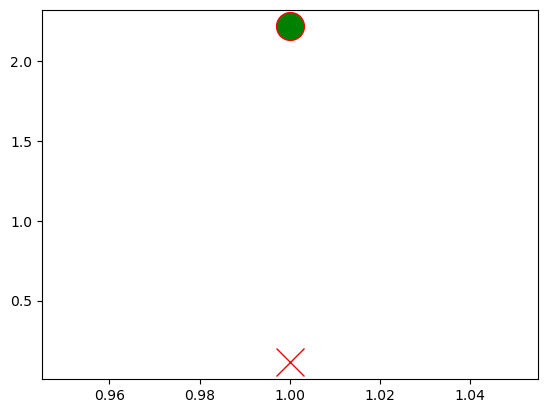

In [ ]:
from numpy.linalg import inv

n = 10

eigs_1 = generate_eigenvalues(n, 1.5, 2) # all the eigenvalues are bigger than 1.5 (lambda 1)
eigs_2 = generate_eigenvalues(n, 0.5, 1) # all the eigenvalues are less than 1 (lambda 2)

# creatin G11 and G22
D_1 = create_diagonal_matrix(eigs_1)
D_2 = create_diagonal_matrix(eigs_2)

S_1 = generate_random_matrix(n)
S_2 = generate_random_matrix(n)

G_1 = np.dot(np.dot(inv(S_1), D_1), S_1)
G_2 = np.dot(np.dot(inv(S_2), D_2), S_2)

lower_b = min(eigs_1) + min(eigs_2) - 2

print(np.sort(eigvals(G_1)))
print(np.sort(eigs_1))

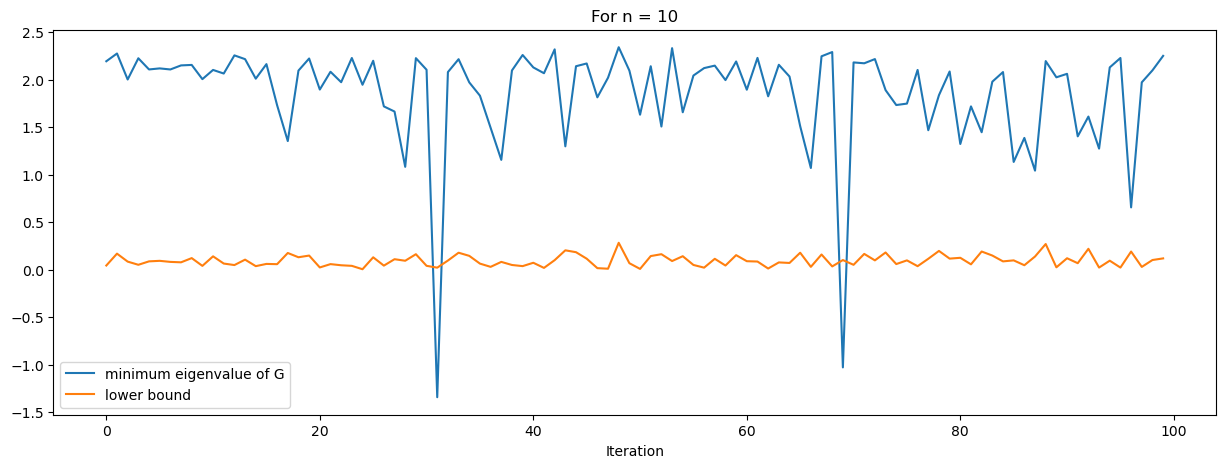

In [ ]:
from numpy.linalg import inv
# TESTS:
n = 10
lower_bound = []
min_G = []
for i in range(100):
    eigs_1 = generate_eigenvalues(n, 1.5, 2) # all the eigenvalues are bigger than 1.5 (lambda 1)
    eigs_2 = generate_eigenvalues(n, 0.5, 1) # all the eigenvalues are less than 1 (lambda 2)
    lower_bound.append(min(eigs_1) + min(eigs_2) - 2) # sum of the smallest eigenvalues of G11 and G22 minus 2
    # creatin G11 and G22
    D_1 = create_diagonal_matrix(eigs_1)
    D_2 = create_diagonal_matrix(eigs_2)

    S_1 = generate_random_matrix(n)
    S_2 = generate_random_matrix(n)

    G_1 = np.dot(np.dot(inv(S_1), D_1), S_1) # this is (2I + ) G11 + G11.T
    G_2 = np.dot(np.dot(inv(S_2), D_2), S_2) # this is (2I + ) G22 + G22.T
    
    min_eig_G = min(eigvals(G_1+G_2))
    # print(np.shape(G_1+G_2))
    min_G.append(min_eig_G)


# plotting the lower bounds and the eigenvalues of the matrix
plt.figure(figsize=(15,5))
plt.plot(min_G, label='minimum eigenvalue of G')
plt.plot(lower_bound, label='lower bound')
plt.xlabel('Iteration')
plt.legend()
plt.title('For n = '+str(n))
plt.show()


In [ ]:
# Since I couldn't generate the matrix with desired diagonal elements and desired eigenvalues at the same time, I try a different approach.
# define a function to create random adjacency matrix of a weighted directed graph with n nodes and weights between -10 and 10 with weights less than a threshold set to 0 and diagonal elements zero
def create_adj_matrix(n, threshold):
    # create a random adjacency matrix
    adj_matrix = np.random.rand(n, n) * 20 - 10
    # set the diagonal elements to zero
    np.fill_diagonal(adj_matrix, 0)
    # set the weights less than threshold to zero
    adj_matrix[abs(adj_matrix) < threshold] = 0
    # return the adjacency matrix
    return adj_matrix

# define a function to compute the maximum and minimum eigenvalues of the matrix
def compute_eigenvalues(adj_matrix):
    # compute the maximum eigenvalue of the adjacency matrix
    max_eig = np.max(np.linalg.eigvals(adj_matrix))
    # compute the minimum eigenvalue of the adjacency matrix
    min_eig = np.min(np.linalg.eigvals(adj_matrix))
    # return the maximum and minimum eigenvalues
    return max_eig, min_eig

In [ ]:
# # create a symmetric matrix with 2 as diagonal elements and minimum eigenvalue larger than 1
# def create_symmetric_matrix(n):
#     # create a random adjacency matrix
#     adj_matrix = create_adj_matrix(n, 2)
#     # create a symmetric matrix
#     symmetric_matrix = adj_matrix + adj_matrix.T
#     # set the diagonal elements to 2
#     np.fill_diagonal(symmetric_matrix, 2)
#     # compute the maximum and minimum eigenvalues of the matrix
#     max_eig, min_eig = compute_eigenvalues(symmetric_matrix)
#     # check if the minimum eigenvalue is larger than 1
#     while min_eig < 1:
#         # create a random adjacency matrix
#         adj_matrix = create_adj_matrix(n, 2)
#         # create a symmetric matrix
#         symmetric_matrix = adj_matrix + adj_matrix.T
#         # set the diagonal elements to 2
#         np.fill_diagonal(symmetric_matrix, 2)
#         # compute the maximum and minimum eigenvalues of the matrix
#         max_eig, min_eig = compute_eigenvalues(symmetric_matrix)
#     # return the symmetric matrix
#     return symmetric_matrix

# IG_11 = create_symmetric_matrix(10)

KeyboardInterrupt: 

# Generating the same thing but using SVD decomposition


In [2]:
# function that generates eigenvalues of a matrix with n nodes and eigenvalues between m and l
def generate_eigenvalues(n, m, l):
    # generate n random eigenvalues between m and l
    eigenvalues = np.random.rand(n) * (l - m) + m
    # return the eigenvalues
    return eigenvalues

# create a diagonal matrix with eigenvalues as it's diagonal entries
def create_diagonal_matrix(eigenvalues):
    # create a diagonal matrix with eigenvalues as it's diagonal entries
    diagonal_matrix = np.diag(eigenvalues)
    # return the diagonal matrix
    return diagonal_matrix

# create a random orthogonal matrix
def generate_orth_matrix(n):
    # generate a random matrix
    random_matrix = np.random.rand(n, n)*20 - 10
    # compute the QR decomposition of the random matrix
    Q, R = np.linalg.qr(random_matrix)
    # return the orthogonal matrix
    return Q

# a function to check determinant of all principal minors of a matrix
def check_p(matrix):
    # check if the determinant of the matrix is zero
    if np.linalg.det(matrix) == 0:
        # return False if the determinant of the matrix is zero
        return False
    # check if the determinant of the principal minors of the matrix is zero
    for i in range(1, len(matrix)):
        if np.linalg.det(matrix[:i, :i]) == 0:
            # return False if the determinant of the principal minors of the matrix is zero
            return False
    # return True if the determinant of the matrix and the principal minors of the matrix is not zero
    return True

In [8]:
n = 3
eigval_test = generate_eigenvalues(n, -5, 0)

D = create_diagonal_matrix(eigval_test)
V = generate_orth_matrix(n)
A = np.dot(np.dot(V, D), V.T) # V D V.T

np.fill_diagonal(A, 2)
print(eigvals(A))

[2.55835711+0.j 1.53039539+0.j 1.9112475 +0.j]


In [ ]:
# from numpy.linalg import eigvals
# # TEST
# n = 10
# counter_desired = 0
# counter_no_condition_p = 0
# counter_condition_p = 0
# for i in range(10000):
#     eigval1 = generate_eigenvalues(n, -4, 0)
#     eigval2 = generate_eigenvalues(n, -4, 0)

#     D = create_diagonal_matrix(eigval1)
#     V = generate_orth_matrix(n)
#     A1 = np.dot(np.dot(V, D), V.T) # V D V.T

#     D = create_diagonal_matrix(eigval2)
#     V = generate_orth_matrix(n)
#     A2 = np.dot(np.dot(V, D), V.T) # V D V.T

#     # replace diagonal elemens of A with 2
#     np.fill_diagonal(A1, 2)
#     np.fill_diagonal(A2, 2)

#     min_e_A1 = min(eigvals(A1))
#     min_e_A2 = min(eigvals(A2))
#     # if min(eigvals(A1)) < 1 and min(eigvals(A1)) > 0 and min(eigvals(A2)) > 0:
#     # # 0 < min_lambda_1 < 1 , 0 < min_lambda_2

#     # if min(eigvals(A1)) > 1 and min(eigvals(A2)) > 1:
#     # # 1 < min_lambda_1 , 1 < min_lambda_2

#     if min_e_A1 < 1 and min_e_A1 > 0 and min_e_A2 < 1 and min_e_A2 > 0:
#       # 0 < min_lambda_1 < 1 && 0 < min_lambda_2 < 1
#       counter_desired += 1
#       if min(eigvals(A1+A2-2*np.eye(n))) > min_e_A1+min_e_A2-2 and min(eigvals(A1+A2-2*np.eye(n))) > 0:
#           # print('condition holds!')
#           counter_condition_p += 1
#       else:
#           # print('condition does not hold!')
#           counter_no_condition_p += 1
        
# print('for n = %d, condition holds %d times' % (n, counter_condition_p))
# print('for n = %d, condition does not hold %d times' % (n, counter_no_condition_p))
# print('for n = %d, we have %d desired matrices' % (n, counter_desired))
# print(counter_condition_p/counter_desired)
#     # print('is our matrix a p-matrix? ' + str(check_p(A1+A2-2*np.eye(n))))

for n = 10, condition holds 1884 times
for n = 10, condition does not hold 5855 times
for n = 10, we have 7739 desired matrices
0.24344230520739113


# Running new tests:
### 1- If 0 < min(eig(1)), min(eig(2)) < 1, then how many times we will have 0 < min(eig(1+2))?
### 2- if 0 < min(eig(1)) < 1 and 1 < min(eig(2)) < 2, then how many times we will have 0 < min(eig(1+2))?

In [22]:
# generate a positive definite matrix with diagonal elements 2
def generate_pd_matrix(n):
    # generate n random eigenvalues between -4 and 0
    eigenvalues = np.random.rand(n) * (-4 - 0) + 0
    # create a diagonal matrix with eigenvalues as it's diagonal entries
    diagonal_matrix = np.diag(eigenvalues)
    # generate a random orthogonal matrix
    random_orth_matrix = np.random.rand(n, n)*20 - 10
    # compute the QR decomposition of the random orthogonal matrix
    Q, R = np.linalg.qr(random_orth_matrix)
    # compute the matrix A
    A = np.dot(np.dot(Q, diagonal_matrix), Q.T)
    # set the diagonal elements of A to 2
    np.fill_diagonal(A, 2)
    # return the matrix A
    return A

# define a function that checks positicve definiteness of a matrix
def is_pos_def(x):
    # check if the matrix is positive definite
    return np.all(np.linalg.eigvals(x) > 0)

A = generate_pd_matrix(30)
print(min(eigvals(A)))
print(max(eigvals(A)))
print(is_pos_def(A))

(0.19372597430725272+0j)
(4.01883958926029+0j)
True


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


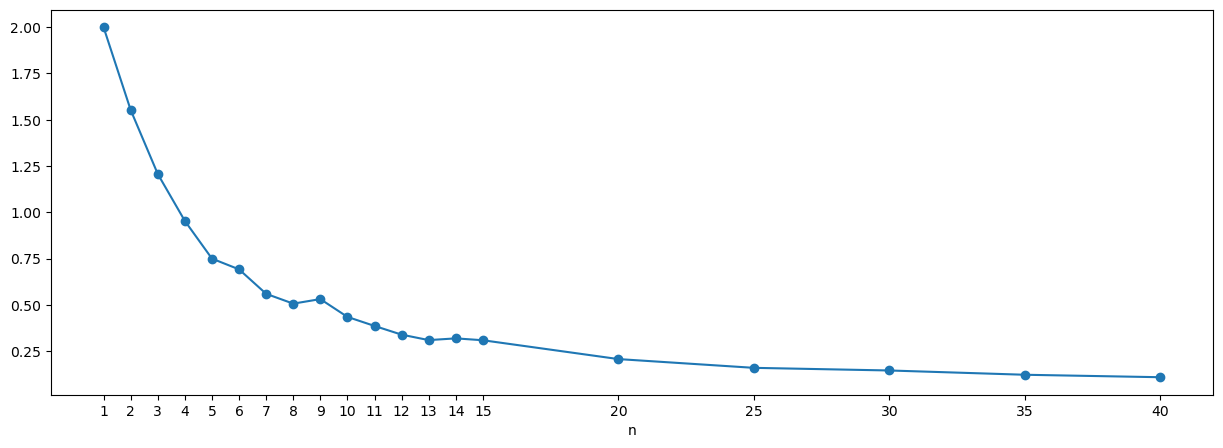

In [25]:
n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40]
whole_min = []
for n in n_list:
    min_list = []
    for i in range(100):
        A = generate_pd_matrix(n)
        eigvals_A = eigvals(A)
        min_eig_A = min(eigvals_A)
        min_list.append(np.mean(min_eig_A))

    whole_min.append(np.mean(min_list))


plt.figure(figsize=(15,5))
plt.plot(n_list, whole_min, 'o-')
plt.xlabel('n')
plt.xticks(n_list)
plt.show()

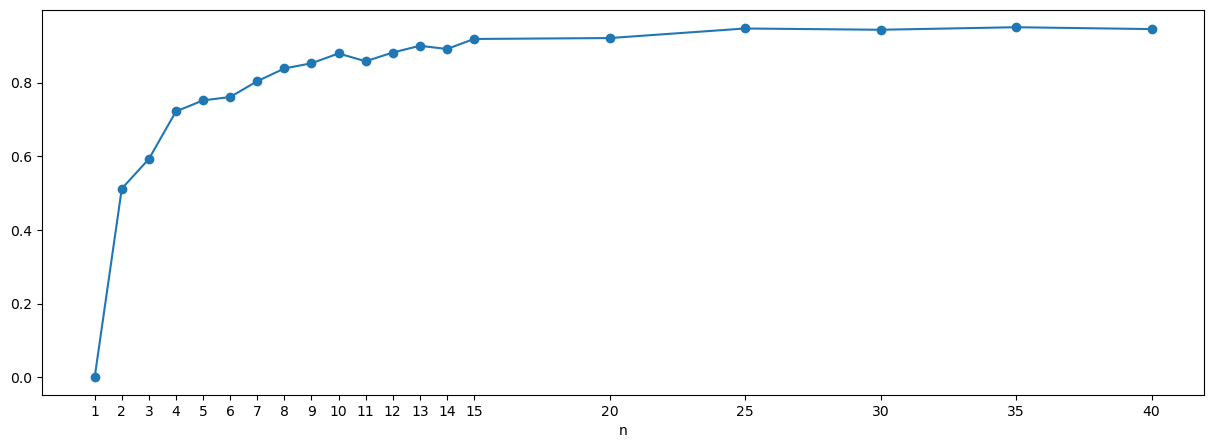

In [24]:
n_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40]
whole_average = []
for n in n_list:
    average_list = []
    for i in range(100):
        A = generate_pd_matrix(n)
        eigvals_A = eigvals(A)
        new_eigvals = eigvals_A-2
        average_eigval = np.mean(np.abs(new_eigvals))
        average_list.append(average_eigval)

    whole_average.append(np.mean(average_list))


plt.figure(figsize=(15,5))
plt.plot(n_list, whole_average, 'o-')
plt.xlabel('n')
plt.xticks(n_list)
plt.show()

In [29]:
# getting test #1
n_list = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]
percentage_list = []
des = []
pd = []

for n in n_list:
    c_desired = 0
    T_is_PD = 0
    lambda_sum = 0
    for i in range(100000):
        T1 = generate_pd_matrix(n) # this is our 2I+G11+G11.T
        T2 = generate_pd_matrix(n) # this is our 2I+G22+G22.T
        T = T1 + T2 - 2*np.eye(n) # this is our 2I+G+G.T
        min_T1 = min(eigvals(T1))
        min_T2 = min(eigvals(T2))
        min_T = min(eigvals(T))
        if (min_T1 < 1 and min_T1 > 0 and min_T2 < 1 and min_T2 > 0):
            c_desired += 1
            if 0 < min_T:
                T_is_PD += 1
                lambda_sum += min_T


    des.append(c_desired)
    pd.append(T_is_PD)
    percentage_list.append(T_is_PD/c_desired*100)
    print('for n = %d, we had %d acceptable type of matrices and %d of them resulted in T being PD.' % (n, c_desired, T_is_PD))

for n = 5, we had 44039 acceptable type of matrices and 24484 of them resulted in T being PD.
for n = 6, we had 57908 acceptable type of matrices and 28767 of them resulted in T being PD.
for n = 7, we had 67670 acceptable type of matrices and 28929 of them resulted in T being PD.
for n = 8, we had 73466 acceptable type of matrices and 26346 of them resulted in T being PD.
for n = 9, we had 76607 acceptable type of matrices and 22601 of them resulted in T being PD.
for n = 10, we had 77787 acceptable type of matrices and 18629 of them resulted in T being PD.
for n = 11, we had 77495 acceptable type of matrices and 14560 of them resulted in T being PD.
for n = 12, we had 77447 acceptable type of matrices and 11283 of them resulted in T being PD.
for n = 13, we had 76297 acceptable type of matrices and 8670 of them resulted in T being PD.
for n = 14, we had 75282 acceptable type of matrices and 6383 of them resulted in T being PD.
for n = 15, we had 73720 acceptable type of matrices and 

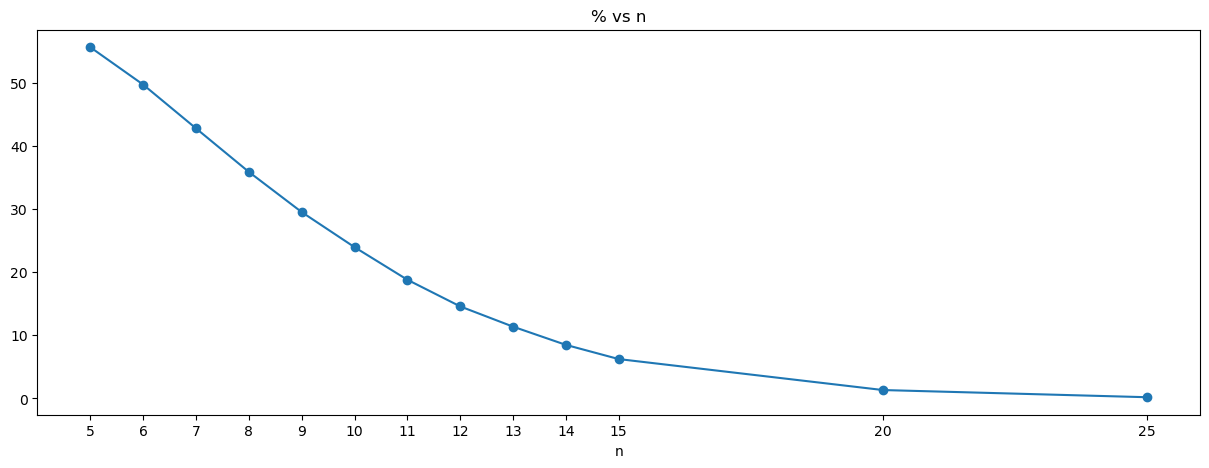

In [30]:
plt.figure(figsize=(15,5))
plt.plot(n_list, percentage_list, 'o-')
plt.xlabel('n')
plt.xticks(n_list)
plt.title('% vs n')
plt.show()

In [278]:
# getting test #2
n_list = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]
percentage_list2 = []
des2 = []
pd2 = []

for n in n_list:
    c_desired = 0
    T_is_PD = 0
    for i in range(100000):
        T1 = generate_pd_matrix(n) # this is our 2I+G11+G11.T
        T2 = generate_pd_matrix(n) # this is our 2I+G22+G22.T
        T = T1 + T2 - 2*np.eye(n) # this is our 2I+G+G.T
        min_T1 = min(eigvals(T1))
        min_T2 = min(eigvals(T2))
        min_T = min(eigvals(T))
        if min_T1 < 1 and min_T1 > 0 and min_T2 < 2 and min_T2 > 1:
            c_desired += 1
            if 0 < min_T:
                T_is_PD += 1
    
    des2.append(c_desired)
    pd2.append(T_is_PD)
    percentage_list2.append(T_is_PD/c_desired*100)
    print('for n = %d, we had %d acceptable type of matrices and %d of them resulted in T being PD.' % (n, c_desired, T_is_PD))

for n = 5, we had 20772 acceptable type of matrices and 17969 of them resulted in T being PD.
for n = 6, we had 15433 acceptable type of matrices and 12940 of them resulted in T being PD.
for n = 7, we had 10481 acceptable type of matrices and 8455 of them resulted in T being PD.
for n = 8, we had 6942 acceptable type of matrices and 5362 of them resulted in T being PD.
for n = 9, we had 4563 acceptable type of matrices and 3355 of them resulted in T being PD.
for n = 10, we had 2885 acceptable type of matrices and 2010 of them resulted in T being PD.
for n = 11, we had 1822 acceptable type of matrices and 1186 of them resulted in T being PD.
for n = 12, we had 1183 acceptable type of matrices and 711 of them resulted in T being PD.
for n = 13, we had 662 acceptable type of matrices and 378 of them resulted in T being PD.
for n = 14, we had 478 acceptable type of matrices and 263 of them resulted in T being PD.
for n = 15, we had 255 acceptable type of matrices and 130 of them resulted

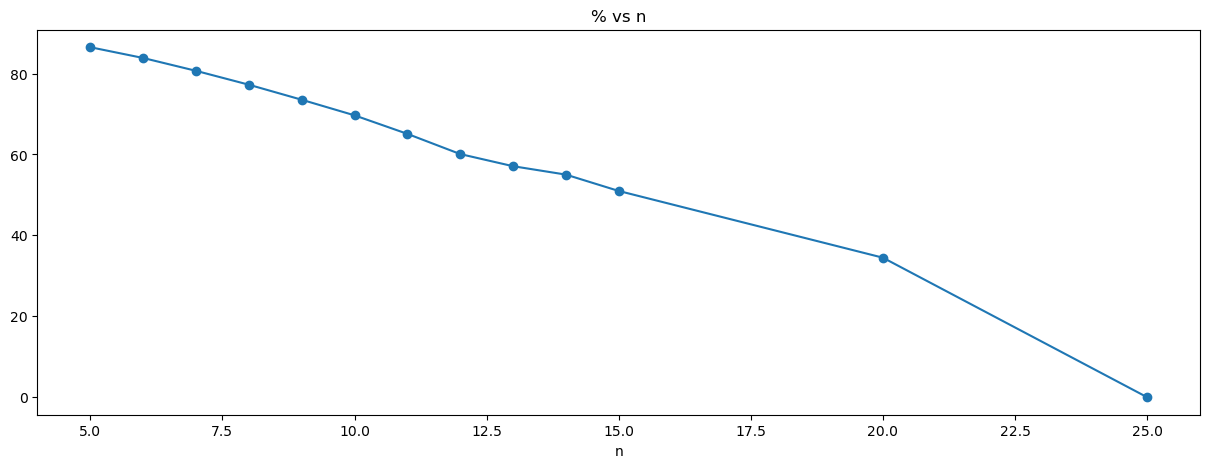

In [280]:
plt.figure(figsize=(15,5))
plt.plot(n_list, percentage_list2, 'o-')
plt.xlabel('n')
plt.title('% vs n')
plt.show()